<a href="https://colab.research.google.com/github/Lesiazhou/QM2/blob/main/salinity_%2B_water_volume%2C_water_characteristics_vs_NDVI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import ee
import pandas as pd
import numpy as np
from datetime import datetime

ee.Authenticate()
ee.Initialize(project='yokomultilinear')


In [ ]:
roi = ee.Geometry.Point(60.79306,46.09667).buffer(10000)

In [ ]:
modis = ee.ImageCollection('MODIS/006/MOD13Q1').filterBounds(roi)
avhrr = ee.ImageCollection('NOAA/CDR/AVHRR/NDVI/V5').filterBounds(roi).filterDate('1980-01-01', '1998-12-31')


In [ ]:
def extract_pixel_ndvi(image):
    ndvi = image.select('NDVI')
    samples = ndvi.addBands(image.metadata('system:time_start','date')).sample(
        region=roi,
        scale=500,
        projection=ndvi.projection(),
        geometries=True
    )
    return samples

In [ ]:
data = []

In [ ]:
avhrr_ndvi = avhrr_ndvi.map(lambda image: image.select('NDVI').multiply(0.0001))

Combining 2 datasets as there is no dataset with continuous data from 1980s till 2004 (dam built in 2005)

In [ ]:


ee.Authenticate()
ee.Initialize(project='yokomultilinear')

roi = ee.Geometry.Point(60.79306, 46.09667).buffer(10000)

# AVHRR GAC NDVI dataset (1980-1998)
avhrr_ndvi = ee.ImageCollection('NOAA/CDR/AVHRR/NDVI/V5').filterBounds(roi)

# MODIS dataset (2000-2004)
modis_ndvi = ee.ImageCollection('MODIS/006/MOD13Q1').filterBounds(roi)

def extract_pixel_ndvi(image):
    ndvi = image.select('NDVI')
    samples = ndvi.addBands(image.metadata('system:time_start', 'date')).sample(
        region=roi,
        scale=5000,  # Adjust scale
        projection=ndvi.projection(),
        geometries=True
    )
    return samples

yearly_data = []

# Extract yearly average NDVI from AVHRR (1980-1999)
for year in range(1980, 2000):
    yearly_avhrr = avhrr_ndvi.filterDate(str(year) + '-01-01', str(year) + '-12-31')

    if yearly_avhrr.size().getInfo() > 0:
        # Mask fill values
        yearly_avhrr = yearly_avhrr.map(lambda image: image.updateMask(image.select('NDVI').neq(-32768)))

        # Calculate yearly average NDVI
        yearly_mean_ndvi = yearly_avhrr.mean().clip(roi).reduceRegion(
            reducer=ee.Reducer.mean(),
            geometry=roi,
            scale=5000
        ).get('NDVI')

        ndvi_value = yearly_mean_ndvi.getInfo()
        # Rescale AVHRR NDVI
        ndvi_value = (ndvi_value / 2550)

        # Optional: Filter outliers or extreme values here (using thresholds, IQR, etc.)

        yearly_data.append([year, ndvi_value, 'AVHRR'])
    else:
        print(f"No AVHRR images found for year {year}. Skipping...")

# Extract yearly average NDVI from MODIS (2000-2004)
for year in range(2000, 2005):
    yearly_modis = modis_ndvi.filterDate(str(year) + '-01-01', str(year) + '-12-31')

    if yearly_modis.size().getInfo() > 0:
        # Calculate yearly average NDVI
        yearly_mean_ndvi = yearly_modis.mean().clip(roi).reduceRegion(
            reducer=ee.Reducer.mean(),
            geometry=roi,
            scale=5000  # Adjust scale
        ).get('NDVI')

        ndvi_value = yearly_mean_ndvi.getInfo()
        # Rescale MODIS NDVI (original data is between 0 and 10000)
        ndvi_value = ndvi_value / 10000

        yearly_data.append([year, ndvi_value, 'MODIS'])
    else:
        print(f"No MODIS images found for year {year}. Skipping...")

# Create a pandas DataFrame
df = pd.DataFrame(yearly_data, columns=['year', 'ndvi', 'source'])

# Print the DataFrame
print(df)

No AVHRR images found for year 1980. Skipping...
    year      ndvi source
0   1981  0.350704  AVHRR
1   1982  0.145903  AVHRR
2   1983  0.129826  AVHRR
3   1984  0.229617  AVHRR
4   1985  0.226007  AVHRR
5   1986  0.248907  AVHRR
6   1987  0.285187  AVHRR
7   1988  0.297736  AVHRR
8   1989  0.231670  AVHRR
9   1990  0.232151  AVHRR
10  1991  0.284608  AVHRR
11  1992  0.308162  AVHRR
12  1993  0.329235  AVHRR
13  1994  0.274052  AVHRR
14  1995  0.357898  AVHRR
15  1996  0.202703  AVHRR
16  1997  0.352335  AVHRR
17  1998  0.201054  AVHRR
18  1999  0.260023  AVHRR
19  2000  0.117162  MODIS
20  2001  0.102420  MODIS
21  2002  0.138161  MODIS
22  2003  0.142248  MODIS
23  2004  0.122575  MODIS


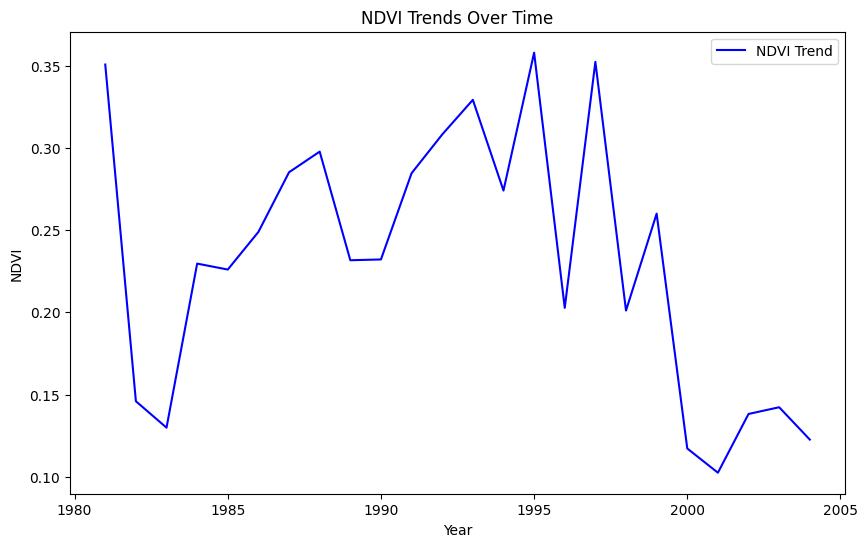

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have a pandas DataFrame 'df' with columns 'year', 'ndvi', and 'source'

# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Plot combined data with connected lines
ax.plot(df['year'], df['ndvi'], label='NDVI Trend', color='blue')  # Plot combined data

# Set plot title and labels
ax.set_title('NDVI Trends Over Time')
ax.set_xlabel('Year')
ax.set_ylabel('NDVI')

# Add legend
ax.legend()

# Display the plot
plt.show()

Importing data for salinity (g/l) and water level(m)

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving salinity.waterlevel.csv to salinity.waterlevel (1).csv


In [ ]:
df=pd.read_csv('salinity.waterlevel (1).csv')
df.head(10)

,Year,Salinity,Water Level,NDVI
0,1981,17.7,45.18,0.350704
1,1982,18.8,44.39,0.145903
2,1983,20.3,43.55,0.129826
3,1984,21.9,42.75,0.229617
4,1985,22.9,41.94,0.226007
5,1986,22.9,41.02,0.248907
6,1987,23.9,40.19,0.285187
7,1988,25.0,39.67,0.297736
8,1989,28.0,39.10,0.231670
9,1990,30.0,38.24,0.232151


In [ ]:
summary=df.describe()
summary=summary.T
summary

,count,mean,std,min,25%,50%,75%,max
Year,24.0,1992.500000,7.071068,1981.00000,1986.750000,1992.50000,1998.250000,2004.000000
Salinity,24.0,38.779167,19.372010,17.70000,23.650000,33.00000,50.000000,86.300000
Water Level,24.0,37.508333,4.188418,31.09000,34.152500,37.07500,40.397500,45.180000
NDVI,24.0,0.232098,0.081015,0.10242,0.144989,0.23191,0.288324,0.357898


NDVI = β0 + β1 * Salinity + β2 * Water_Level + ε

- NDVI: The dependent variable
- Salinity: The first predictor variable
- Water_Level: The second predictor variable
- β0: The intercept (the value of NDVI when salinity and water level are 0)
- β1: The coefficient for salinity (the change in NDVI for a unit change in salinity)
- β2: The coefficient for water level (the change in NDVI for a unit change in water level)
- ε: The error term (the difference between the observed and predicted NDVI values)

In [ ]:
import statsmodels.formula.api as sm
from statsmodels.formula.api import ols
from statsmodels.iolib.summary2 import summary_col
Water_Level = df['Water Level']
model = ols('NDVI ~ Salinity + Water_Level', data=df).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                   NDVI   R-squared:                       0.388
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     6.657
Date:                Wed, 01 Jan 2025   Prob (F-statistic):            0.00576
Time:                        17:05:51   Log-Likelihood:                 32.664
No. Observations:                  24   AIC:                            -59.33
Df Residuals:                      21   BIC:                            -55.79
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.0561      0.353      2.994      

Index(['Year', 'Salinity', 'Water Level', 'NDVI'], dtype='object')


# **Aral sea morphometric characteristics---water volume + water surface area + water volume (1981-2004) vs NDVI**

In [1]:
from google.colab import files
uploaded = files.upload()

Saving Aral_Sea_Characteristics__1981-2004_.csv to Aral_Sea_Characteristics__1981-2004_.csv


In [9]:
df1=pd.read_csv('Aral_Sea_Characteristics__1981-2004_.csv')
df1.head(10)

,Year,Water Level (m),Water Surface Area (thousand km²),Water Volume (km³)
0,1981,45.18,48.63,625.78
1,1982,44.39,47.13,578.65
2,1983,43.55,46.07,532.58
3,1984,42.75,44.92,487.66
4,1985,41.94,43.08,444.58
5,1986,41.02,38.56,380.63
6,1987,40.19,37.13,343.17
7,1988,39.67,36.18,312.65
8,1989,39.10,35.30,306.92
9,1990,38.24,33.67,280.44


In [15]:
ndvi_data = {
    "Year": [
        1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
        1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
        2001, 2002, 2003, 2004
    ],
    "NDVI": [
        0.350704, 0.145903, 0.129826, 0.229617, 0.226007, 0.248907, 0.285187,
        0.297736, 0.231670, 0.232151, 0.284608, 0.308162, 0.329235, 0.274052,
        0.357898, 0.202703, 0.352335, 0.201054, 0.260023, 0.117162,
        0.102420, 0.138161, 0.142248, 0.122575
    ]
}

ndvi_df = pd.DataFrame(ndvi_data)

# Merge the two DataFrames on the "Year" column
merged_df = pd.merge(df1, ndvi_df, on="Year")
merged_df

,Year,Water Level (m),Water Surface Area (thousand km²),Water Volume (km³),NDVI
0,1981,45.18,48.63,625.78,0.350704
1,1982,44.39,47.13,578.65,0.145903
2,1983,43.55,46.07,532.58,0.129826
3,1984,42.75,44.92,487.66,0.229617
4,1985,41.94,43.08,444.58,0.226007
5,1986,41.02,38.56,380.63,0.248907
6,1987,40.19,37.13,343.17,0.285187
7,1988,39.67,36.18,312.65,0.297736
8,1989,39.10,35.30,306.92,0.231670
9,1990,38.24,33.67,280.44,0.232151


<Figure size 1200x600 with 0 Axes>

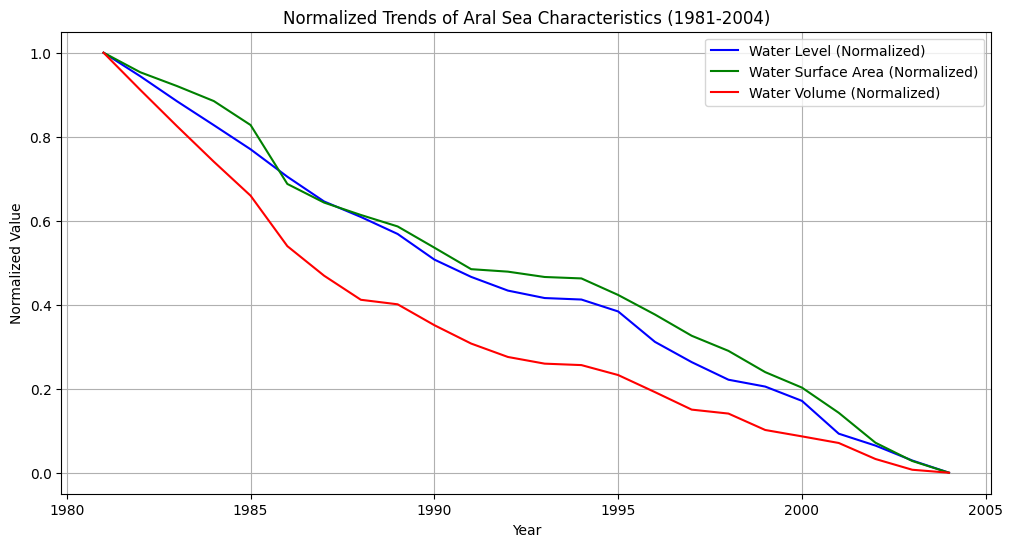

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

normalized_df = df.copy()
for column in ["Water Level (m)", "Water Surface Area (thousand km²)", "Water Volume (km³)"]:
    normalized_df[column] = (df[column] - df[column].min()) / (df[column].max() - df[column].min())

plt.figure(figsize=(12, 6))
plt.plot(normalized_df["Year"], normalized_df["Water Level (m)"], label="Water Level (Normalized)", color="blue")
plt.plot(normalized_df["Year"], normalized_df["Water Surface Area (thousand km²)"], label="Water Surface Area (Normalized)", color="green")
plt.plot(normalized_df["Year"], normalized_df["Water Volume (km³)"], label="Water Volume (Normalized)", color="red")

plt.legend()
plt.title("Normalized Trends of Aral Sea Characteristics (1981-2004)")
plt.xlabel("Year")
plt.ylabel("Normalized Value")
plt.grid(True)
plt.show()

NDVI = β0 + β1 * water_level + β2 * water_surface_area + β3 * water_volume + ε

*   NDVI: The dependent variable
*   water_level: The first predictor variable
*   water_surface_area: The second predictor variable
*   water_volume:  The third predictor variable


*   β0: The intercept (the value of NDVI when all factors are 0)
*   β1: The coefficient for water levl (the change in NDVI for a unit change in salinity)
*   β2: The coefficient for water surface area (the change in NDVI for a unit change in water level)
*   β3: The coefficient for water volume
*   ε: The error term (the difference between the observed and predicted NDVI values)



In [21]:
import statsmodels.formula.api as sm
from statsmodels.formula.api import ols
from statsmodels.iolib.summary2 import summary_col
water_level = merged_df['Water Level (m)']
water_surface_area=merged_df['Water Surface Area (thousand km²)']
water_volume=merged_df['Water Volume (km³)']
NDVI=merged_df['NDVI']
model = ols('NDVI ~ water_level + water_surface_area + water_volume', data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   NDVI   R-squared:                       0.411
Model:                            OLS   Adj. R-squared:                  0.323
Method:                 Least Squares   F-statistic:                     4.651
Date:                Fri, 03 Jan 2025   Prob (F-statistic):             0.0127
Time:                        14:14:11   Log-Likelihood:                 33.122
No. Observations:                  24   AIC:                            -58.24
Df Residuals:                      20   BIC:                            -53.53
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -1.0916      1

# **Results**
The OLS regression results show that the model explains 41.1% of the variance in NDVI (R² = 0.411) and is statistically **significant overall** (F-statistic p = 0.0127).

*   Among the variables, only **Water Volume** has a significant negative impact on NDVI(p = 0.005)
*   Water Level and Water Surface Area are not significant predictors.